<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220617.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Regressor 
* Customer Analysis

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as gg
from plotnine import ggplot, aes
from datetime import datetime, date, time, timezone, timedelta
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score, mean_squared_error
import sklearn.datasets as skd 

# Regressor

In [42]:
raw = skd.make_classification(n_samples = 10000, n_features = 10, n_classes = 2)
raw

(array([[ 1.3066132 ,  0.77664859,  1.15185964, ..., -1.06419937,
         -0.57852254, -1.33102956],
        [-0.03643376, -0.80874294,  0.23163303, ..., -0.47680075,
         -0.51618256, -0.92421256],
        [-1.2320341 ,  0.72303516,  1.3935031 , ...,  0.63998696,
          0.92365379,  1.28729838],
        ...,
        [ 1.40547357,  1.09010422, -0.95025933, ...,  0.1954189 ,
         -1.1765904 , -0.49675863],
        [-0.16191323, -0.94525855,  1.9328101 , ...,  0.84889256,
          0.35146487, -0.33024965],
        [-1.09232484,  1.631963  ,  1.28118524, ..., -0.54359546,
          0.03258566,  1.69566044]]), array([1, 0, 1, ..., 1, 0, 1]))

In [43]:
x = pd.DataFrame(raw[0], columns = [f'f{a}' for a in range(1, 11)])
y = raw[1]
x.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,1.306613,0.776649,1.151860,-0.221928,0.868718,-0.140718,0.159920,-1.064199,-0.578523,-1.331030
1,-0.036434,-0.808743,0.231633,0.368498,-0.754904,-1.292823,-0.041647,-0.476801,-0.516183,-0.924213
2,-1.232034,0.723035,1.393503,-0.175773,0.842347,0.653361,-0.193144,0.639987,0.923654,1.287298
3,0.227279,2.112676,0.007292,-0.903830,2.036096,0.646904,0.260117,-0.516648,0.834743,-0.950823
4,-0.753188,-2.083304,0.966080,0.984708,-1.905971,-0.340298,0.042441,-0.541274,0.752966,-0.794250


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


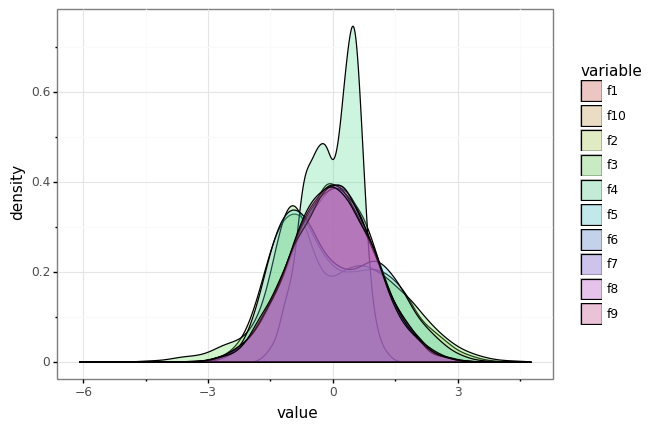

<ggplot: (8762690889745)>

In [44]:
(
    ggplot(pd.melt(x.assign(a = 1), id_vars = 'a'),
           aes('value', fill = 'variable')
           ) +
    gg.geom_density(alpha = .3) +
    gg.theme_bw()
)

In [45]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [49]:
fit_lg = LogisticRegression().fit(x_tr, y_tr)
fit_rf = RandomForestClassifier().fit(x_tr, y_tr)

pred_lg = fit_lg.predict(x_te)
pred_rf = fit_lg.predict(x_te)
proba_rf = fit_lg.predict_proba(x_te)[:,-1]

In [47]:
accuracy_score(y_te, pred_lg), accuracy_score(y_te, pred_rf)

(0.9013333333333333, 0.9013333333333333)

In [50]:
fpr, tpr, thre = roc_curve(y_te, proba_rf)

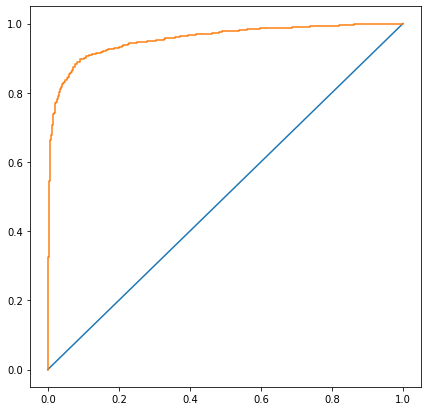

In [52]:
plt.figure(figsize = [7,7])
plt.plot([0,1], [0,1])
plt.plot(fpr, tpr)

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'test.csv',
 'item_categories.csv',
 'sales_train.csv',
 'shops.csv',
 'sample_submission.csv',
 'items.csv',
 'retail_data_response.csv',
 'rfm_test.csv',
 '.Rhistory',
 'online_retail_II.xlsx',
 'retail_data_transactions.csv',
 'ecommerce-data.csv',
 'sample_data']

In [9]:
df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'Transactions')

In [10]:
df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [11]:
df.shape

(20001, 13)

In [53]:
df.columns = df.iloc[0]
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [59]:
df = df.drop([0], axis = 0)
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [60]:
df.isnull().sum()

0
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [62]:
df = df.dropna()
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [63]:
df_ = df[df['order_status'] == 'Approved']
df_.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [66]:
df_['date'] = df_['transaction_date'].to_numpy().astype('datetime64[D]')
df_['month'] = df_['transaction_date'].to_numpy().astype('datetime64[M]')
df_.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,date,month
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245,2017-02-25,2017-02-01
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701,2017-05-21,2017-05-01
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361,2017-10-16,2017-10-01
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145,2017-08-31,2017-08-01
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226,2017-10-01,2017-10-01


In [67]:
df_.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'date', 'month'],
      dtype='object', name=0)

In [70]:
df_ = df_[['customer_id','date', 'month', 'list_price']].rename(columns = {'customer_id':'id', 'list_price':'rev'})
df_.head()

,id,date,month,rev
1,2950,2017-02-25,2017-02-01,71.49
2,3120,2017-05-21,2017-05-01,2091.47
3,402,2017-10-16,2017-10-01,1793.43
4,3135,2017-08-31,2017-08-01,1198.46
5,787,2017-10-01,2017-10-01,1765.3


In [76]:
df_ = df_.sort_values(['id', 'date'], ascending = [1, 1])
df_ = df_.groupby(['id', 'date', 'month'])['rev'].sum().reset_index()
df_.head()

,id,date,month,rev
0,1,2017-01-05,2017-01-01,360.4
1,1,2017-02-21,2017-02-01,71.49
2,1,2017-03-27,2017-03-01,688.63
3,1,2017-03-29,2017-03-01,1274.93
4,1,2017-04-06,2017-04-01,1577.53


In [77]:
list_pu = df_.groupby(['id', 'month']).first().reset_index()
list_npu = df_.groupby(['id']).first().reset_index()
list_mon = df_['month'].sort_values().unique()

In [105]:
for mon in list_mon :
  
  temp_npu = list_npu[list_npu['month'] == mon]
  temp_pu = list_pu[list_pu['id'].isin(temp_npu['id'])]
  temp = temp_pu.groupby(['month'])['rev'].count().reset_index().rename(columns = {'rev':'pu'})
  temp = temp.assign(npu_month = mon,
              num = temp['month'].rank(),
              ratio = [x/temp['pu'].iloc[0] for x in temp['pu']]
              ).reindex(columns = ['npu_month', 'num', 'pu', 'ratio'])
  
  if mon == list_mon[0] :

    res = temp

  else : 

    res = pd.concat([res, temp], axis = 0)

res.head()

,npu_month,num,pu,ratio
0,2017-01-01,1.0,1315,1.000000
1,2017-01-01,2.0,461,0.350570
2,2017-01-01,3.0,475,0.361217
3,2017-01-01,4.0,474,0.360456
4,2017-01-01,5.0,470,0.357414


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


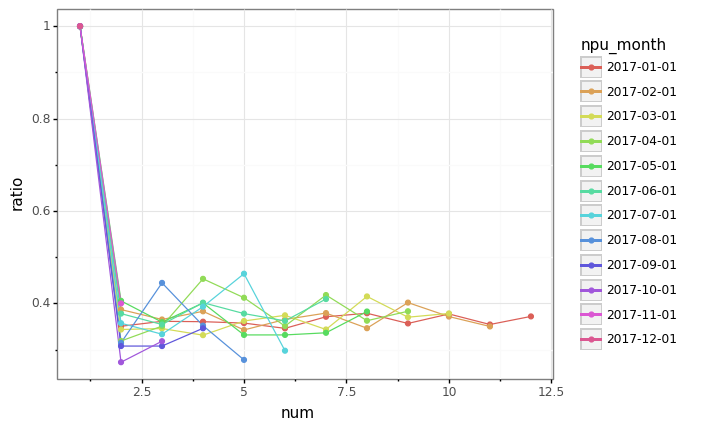

<ggplot: (8762690875101)>

In [108]:
(
    ggplot(res.assign(npu_month = res['npu_month'].astype(str)), 
           aes('num', 'ratio', color = 'npu_month')) +
    gg.geom_line() +
    gg.geom_point() +
    gg.theme_bw()
)

In [110]:
df_.head()

,id,date,month,rev
0,1,2017-01-05,2017-01-01,360.4
1,1,2017-02-21,2017-02-01,71.49
2,1,2017-03-27,2017-03-01,688.63
3,1,2017-03-29,2017-03-01,1274.93
4,1,2017-04-06,2017-04-01,1577.53


In [120]:
info_m = df_.groupby(['id', 'month'])['rev'].sum().reset_index().rename(columns = {'rev':'money'})
info_m = pd.pivot_table(info_m, index = 'id', columns = 'month', values = 'money').reset_index()
info_m = pd.melt(info_m, id_vars = 'id', var_name = 'month', value_name = 'money').sort_values(['id', 'month'], ascending = [1, 0])
info_m = info_m.groupby(['id']).head(3)
info_m = info_m.groupby(['id'])['money'].sum().reset_index()
info_m.head()

,id,money
0,1,1209.08
1,2,0.00
2,3,0.00
3,4,0.00
4,5,1812.75


In [121]:
info_f = df_.groupby(['id', 'month'])['rev'].count().reset_index().rename(columns = {'rev':'freq'})
info_f = pd.pivot_table(info_f, index = 'id', columns = 'month', values = 'freq').reset_index()
info_f = pd.melt(info_f, id_vars = 'id', var_name = 'month', value_name = 'freq').sort_values(['id', 'month'], ascending = [1, 0])
info_f = info_f.groupby(['id']).head(3)
info_f = info_f.groupby(['id'])['freq'].sum().reset_index()
info_f.head()

,id,freq
0,1,3.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,1.0


In [123]:
df_['date'].max()

Timestamp('2017-12-30 00:00:00')

In [126]:
date_now = datetime(2017,12,31)

In [132]:
info_r = df_.groupby(['id']).agg({'date':lambda x : (date_now - x.iloc[0]).days}).reset_index().rename(columns = {'date':'recency'})
info_r.head()

,id,recency
0,1,360
1,2,241
2,3,311
3,4,272
4,5,303


In [135]:
info = pd.merge(info_f, info_m, 'left', 'id')
info = pd.merge(info, info_r, 'left', 'id')
info.head()

,id,freq,money,recency
0,1,3.0,1209.08,360
1,2,0.0,0.00,241
2,3,0.0,0.00,311
3,4,0.0,0.00,272
4,5,1.0,1812.75,303


In [144]:
info = info.assign(f = pd.qcut(info['freq'].rank(method = 'first'), 5, list('54321')),
            m = pd.qcut(info['money'].rank(method = 'first'), 5, list('54321')),
            r = pd.qcut(info['recency'], 5, list('12345'))
            )
info = info.assign(rf = info['r'].astype(str) + info['f'].astype(str))
info.head()

,id,freq,money,recency,f,m,r,rf
0,1,3.0,1209.08,360,1,3,5,51
1,2,0.0,0.00,241,5,5,1,15
2,3,0.0,0.00,311,5,5,3,35
3,4,0.0,0.00,272,5,5,2,25
4,5,1.0,1812.75,303,4,2,2,24


In [145]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [148]:
info = info.assign(rf = info['rf'].replace(seg_map, regex = True))
info.head()

,id,freq,money,recency,f,m,r,rf
0,1,3.0,1209.08,360,1,3,5,new_customers
1,2,0.0,0.00,241,5,5,1,cant_loose
2,3,0.0,0.00,311,5,5,3,loyal_customers
3,4,0.0,0.00,272,5,5,2,cant_loose
4,5,1.0,1812.75,303,4,2,2,at_Risk


In [150]:
cnt = info.groupby(['rf', 'm'])['id'].count().reset_index().rename(columns = {'id':'cnt'})
cnt.head()

,rf,m,cnt
0,about_to_sleep,5,0
1,about_to_sleep,4,13
2,about_to_sleep,3,34
3,about_to_sleep,2,89
4,about_to_sleep,1,143


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


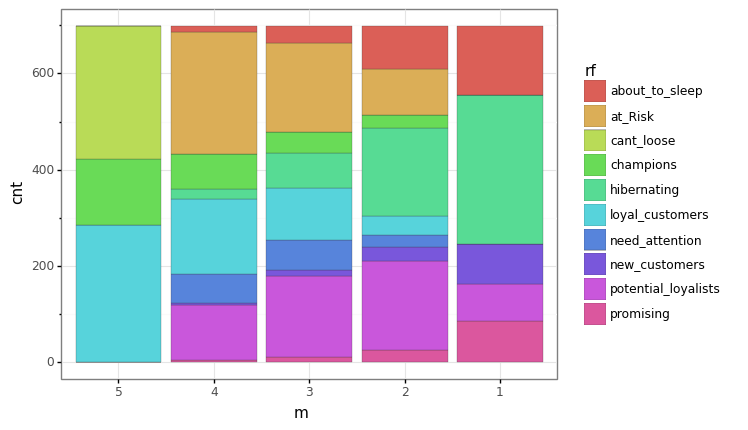

<ggplot: (8762691084673)>

In [152]:
(
    ggplot(cnt, aes('m','cnt', fill = 'rf')) + 
    gg.geom_col(color = '#333333', size = 0.1) +
    gg.theme_bw() 
)